# Assignment 2
This is due by 5pm on Friday 21st February. The mark breakdown is:

- Q0 [1 marks]
- Q1 [10 marks]
- Q2 [10 marks]
- Q3 [9 marks]

It is adviseable that you tidy up your notebook before submitting the final version. Also, remember to add comments to your code.

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1: Bisection method

### Q. 1a
Define a function for the quintic $f(x) = x^5+12 x^4-15 x^3-386 x^2-180 x+1800$ and plot it in the range $x=-11\dots6$

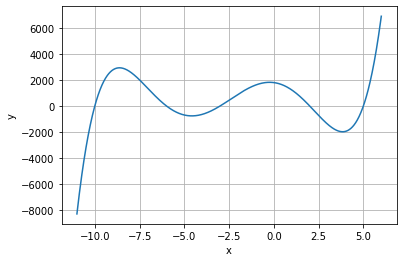

In [35]:
#defining a funtion
def f(x):
    return x**5+12*(x**4)-15*(x**3)-386*(x**2)-180*(x)+1800 
#plotting the function
x= np.linspace(-11,6,1000)
y= f(x)

f(np.array([5,6]))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)


### Q. 1b
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.

In [45]:
print(("f(a)= "), f(2.5))

f(a)=  -730.46875


In [46]:
print("f(b)= ", f(6))

f(b)=  6912


Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [40]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [50]:
FindRootBisection(f, 2.5, 6, 10**-12)

4.999999999999432

### Q. 1c
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that: 
 - **also** works when $f(a) > 0 > f(b)$. 
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "Cannot use bisection method as sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values
 
Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = 2.5$ and $x=6$
 - attempting to find a root between $x=6$ and $x=8$ (there is no root in this region)

In [53]:
# This function works when a < b and f(a) < 0 < f(b) 
#this new funtion works for the above but also for when f(a) > 0 > f(b)
def FindRootBisectionImproved(f, a, b, tol, printSteps=False):
    if np.sign(f(a)) == np.sign(f(b)):
        return "cannot use bisection method as sign(f(a)) = (f(b)))"
    elif f(a) < 0 < f(b):
        left = a
        right = b
    else:
        left = b
        right = a
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [54]:
print(FindRootBisectionImproved(f, 2.5, 6, 10**-12))

4.999999999999432


In [55]:
print(FindRootBisectionImproved(f, 6, 8, 10**-12))

cannot use bisection method as sign(f(a)) = (f(b)))


**Commit this question to your git repository and push the changes to GitHub**

## Question 2: Newton-Raphson method

### Q. 2a
 - Define a function $p(x) = \sinh^{-1} x$. Calculate its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-11$ and $x=6$. Label the plot axes and use a grid.

### Q. 2b
 - Starting with a value near the root use the below Newton-Raphson code to find the root

In [34]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps):
            print("x_%d = %.14lf" % (count, x0))
    return x0

### Q. 2c
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) with labels and a grid

- We want to find a root with $x \neq 0$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root of $F2(x)$ to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the vaue of the root of the variable 'x2' and also print(x2).
- Use the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and the algorithm does not converge.

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge?
 
In both cases set the final argument to 'True' to get the function to print the steps the method is taking

**Commit this question to your git repository and push the changes to GitHub**

## Question 3: Slow convergence of the Newton-Raphson method at repeated roots
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x-2)^2(x+1)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots3$

Run the FindRootNewtonRaphson function with the final (optional) argument set to True to see the steps the algorithm takes. Run it with:
 - the initial value of $x_0 = 3$
 - the initial value of $x_0 = -2$

What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [100]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 3$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -2$. Assign the result to a different variable.

Plot the absolute difference between the steps and the root, i.e., $|x_n - x_*|$, on a log scale.

You should find the difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub**

## Submitting the assignment

Submit the assignment the same way you did with the first one.

To submit your assignment you should zip the ACM20030-Assignments folder. Rename the zip file ACM20030-Assignments2-STUDENTNUMBER.zip where STUDENTNUMBER is your student number. Upload the zip file to BrightSpace.